## To predict the ratings of the App (before/after launching it on Play Store).

1) Supervised Model <br>
2) Regression - predict continuous variable

### Packages

In [253]:
####packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.preprocessing import LabelBinarizer, StandardScaler,MinMaxScaler
from matplotlib.pyplot import pie, axis, show
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from IPython.display import Image


### Data description

In [98]:
####data import 
playstore_data=pd.read_csv("googleplaystore.csv")
###summary
playstore_data.head(10)
###type 
playstore_data.info()
####describe --- useful for float data for min,max and quartiles
playstore_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Data Pre-processing and Exploration

In [101]:
##########find duplicate records
df_dup=pd.DataFrame()
df_dup['Dup']=playstore_data.duplicated()
df_dup.loc[df_dup['Dup']==True]

,Dup
229,True
236,True
239,True
256,True
261,True
265,True
266,True
267,True
268,True
269,True


In [102]:
playstore_data=playstore_data.drop_duplicates()
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
App               10358 non-null object
Category          10358 non-null object
Rating            8893 non-null float64
Reviews           10358 non-null object
Size              10358 non-null object
Installs          10358 non-null object
Type              10357 non-null object
Price             10358 non-null object
Content Rating    10357 non-null object
Genres            10358 non-null object
Last Updated      10358 non-null object
Current Ver       10350 non-null object
Android Ver       10355 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [103]:
#####rows where Ratings is null or nan
playstore_data.loc[playstore_data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In [104]:
####compare Category and Genre column ..are they unique?  
playstore_data['Genres'].unique()==playstore_data['Category'].unique()    ##False

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


False

In [105]:
########app with maxinum rating
print(playstore_data.loc[playstore_data['Rating']==19].index)
playstore_data.loc[playstore_data['Rating']==19]

Int64Index([10472], dtype='int64')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [107]:
###one anomaly : invalid entry (10472	Life Made WI-Fi Touchscreen Photo Frame	1.9	19.0	3.0M	1,000+	Free	0	Everyone	NaN	February 11, 2018	1.0.19	4.0 and up	NaN)
playstore_data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [108]:
###resoledthe invalid entry
playstore_data.loc[10472,playstore_data.columns[1:]]=playstore_data.loc[10472,playstore_data.columns[1:]].shift(1)

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [109]:
############data types 
playstore_data.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [110]:
###########convert rating column datatype from object to numeric
#playstore_data['Rating'].astype('float64')
playstore_data['Rating']=pd.to_numeric(playstore_data['Rating'])
playstore_data.dtypes

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [111]:
#######inspecting Rating column
print(playstore_data['Rating'].dtype)
print(playstore_data['Rating'].value_counts(dropna=False))
print(playstore_data['Rating'].describe())
# count    8893.000000
# mean        4.187619
# std         0.522910
# min         1.000000
# 25%         4.000000
# 50%         4.300000
# 75%         4.500000
# max         5.000000
print(playstore_data.loc[playstore_data['Rating'].isnull()]) ###rating - null records

float64
NaN     1465
 4.4    1032
 4.3    1016
 4.5     977
 4.2     888
 4.6     768
 4.1     657
 4.0     539
 4.7     484
 3.9     372
 3.8     293
 5.0     271
 3.7     231
 4.8     228
 3.6     169
 3.5     157
 3.4     127
 3.3     101
 4.9      87
 3.0      82
 3.1      69
 3.2      64
 2.9      45
 2.8      40
 2.6      24
 2.7      23
 2.3      20
 2.5      20
 2.4      19
 1.0      16
 2.2      14
 1.9      13
 2.0      12
 1.7       8
 1.8       8
 2.1       8
 1.6       4
 1.5       3
 1.4       3
 1.2       1
Name: Rating, dtype: int64
count    8893.000000
mean        4.187619
std         0.522910
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64
                                                     App             Category  \
23                                Mcqueen Coloring pages       ART_AND_DESIGN   
113                            Wrinkles and rejuvenation               BEAUTY   
123  

In [112]:
##########inspecting App column
print(playstore_data['App'])
print(playstore_data['App'].describe())
# count      10841
# unique      9660
# top       ROBLOX
# freq           9
# Name: App, dtype: object


0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
5                               Paper flowers instructions
6                  Smoke Effect Photo Maker - Smoke Editor
7                                         Infinite Painter
8                                     Garden Coloring Book
9                            Kids Paint Free - Drawing Fun
10                                 Text on Photo - Fonteee
11                 Name Art Photo Editor - Focus n Filters
12                          Tattoo Name On My Photo Editor
13                                   Mandala Coloring Book
14         3D Color Pixel by Number - Sandbox Art Coloring
15                         Learn To Draw Kawaii Characters
16            Photo Designer - Write your name with shap

In [113]:
##########inspecting Category column
print(playstore_data['Category'])
print(playstore_data['Category'].value_counts(dropna=False))
print(playstore_data['Category'].dtype)###object
playstore_data['Category']=playstore_data['Category'].astype('category')
print(playstore_data['Category'].dtype)

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
5             ART_AND_DESIGN
6             ART_AND_DESIGN
7             ART_AND_DESIGN
8             ART_AND_DESIGN
9             ART_AND_DESIGN
10            ART_AND_DESIGN
11            ART_AND_DESIGN
12            ART_AND_DESIGN
13            ART_AND_DESIGN
14            ART_AND_DESIGN
15            ART_AND_DESIGN
16            ART_AND_DESIGN
17            ART_AND_DESIGN
18            ART_AND_DESIGN
19            ART_AND_DESIGN
20            ART_AND_DESIGN
21            ART_AND_DESIGN
22            ART_AND_DESIGN
23            ART_AND_DESIGN
24            ART_AND_DESIGN
25            ART_AND_DESIGN
26            ART_AND_DESIGN
27            ART_AND_DESIGN
28            ART_AND_DESIGN
29            ART_AND_DESIGN
                ...         
10811      AUTO_AND_VEHICLES
10812                 FAMILY
10813               BUSINESS
10814         

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [114]:
##########null values in category column( 1) 
playstore_data.loc[playstore_data['Category'].isnull()==True]
playstore_data["Category"].fillna("PERSONALIZATION", inplace = True) 


c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [115]:
############categorywise average rating
playstore_data.groupby('Category')['Rating'].mean()


Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
COMICS                 4.155172
COMMUNICATION          4.151466
DATING                 3.971698
EDUCATION              4.375969
ENTERTAINMENT          4.136036
EVENTS                 4.435556
FAMILY                 4.191153
FINANCE                4.127445
FOOD_AND_DRINK         4.164151
GAME                   4.281285
HEALTH_AND_FITNESS     4.261450
HOUSE_AND_HOME         4.164706
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.096066
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.182450
NEWS_AND_MAGAZINES     4.128505
PARENTING              4.300000
PERSONALIZATION        4.326045
PHOTOGRAPHY            4.182895
PRODUCTIVITY           4.201796
SHOPPING               4.251485
SOCIAL                 4.254918
SPORTS                 4.225175
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.094146

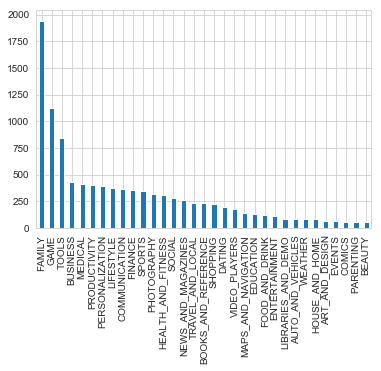

In [116]:
playstore_data['Category'].value_counts().plot(kind='bar')

In [117]:
############inspecting Reviwes column
print(playstore_data['Reviews'].dtype)
playstore_data['Reviews']=playstore_data['Reviews'].astype('int64')
print(playstore_data['Reviews'].dtype)

object
int64


c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
############inspecting Size column
print(playstore_data['Size'].dtype)
print(playstore_data['Size'].unique())
print(playstore_data['Size'].value_counts(dropna=False))


object
['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M' '556k' '526k' '76M'

In [31]:
###converting KBs to MBs and Size datatype to numeric
# playstore_data['Size'].map(lambda x: x.rstrip('M') if 'M' in x else x)
# playstore_data['Size']

In [119]:
############Removing 'M' and 'k' , KB'S to MB's
def conversion(l):
    new=[]
    for x in l:
        if 'm'.upper() in x.upper():
            x=x.rstrip('M')
            new.append(x)
        elif 'k'.upper() in x.upper():
            x=x.rstrip('k')
            x=np.round(float(x)/1024,2)
            new.append(x)
        else: 
            ####for size = 'Varies with devicce'
            x=np.nan
            new.append(x)
    df['New']=new

In [120]:
df=pd.DataFrame()
df['Test']=playstore_data['Size']

In [121]:
conversion(df['Test'])

In [122]:
playstore_data['UpdatedSize']=df['New']

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
playstore_data['UpdatedSize']=pd.to_numeric(playstore_data['UpdatedSize'])

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
#############nan value in UpdatedSize
playstore_data['UpdatedSize'].isna().sum()




1526

In [125]:
############inspecting ContentRatings column
print(playstore_data['Content Rating'].dtype)
print(playstore_data['Content Rating'].unique())#['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
print(playstore_data['Content Rating'].value_counts())
###removing Unrated Content Rating records
print(np.where(playstore_data['Content Rating']=='Unrated'))
playstore_data=playstore_data[playstore_data['Content Rating']!='Unrated']
# print(playstore_data['Content Rating'].dtype)

object
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
Everyone           8383
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64
(array([6843, 7795], dtype=int64),)


In [126]:
######converting Content rating column datatype from object to category
playstore_data['Content Rating']=playstore_data['Content Rating'].astype('category')


In [127]:
############inspecting Installs column
print(playstore_data['Installs'].dtype)
print(playstore_data['Installs'].value_counts())
#######remove '+' sign and ',' and making it numeric
playstore_data['Installs']=playstore_data['Installs'].map(lambda x : x.rstrip('+'))
playstore_data['Installs']=playstore_data['Installs'].map(lambda x : x.replace(',',''))
playstore_data['Installs']=playstore_data['Installs'].astype('int64')
print(playstore_data['Installs'].dtype)
print(playstore_data['Installs'].value_counts())

object
1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             891
100+               710
5,000,000+         683
500,000+           517
50,000+            473
5,000+             469
10+                385
100,000,000+       369
500+               327
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64
int64
1000000       1488
10000000      1132
100000        1129
10000         1033
1000           891
100            710
5000000        683
500000         517
50000          473
5000           469
10             385
100000000      369
500            327
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Name: Installs, dtype: int64


In [128]:
############inspecting Price column
print(playstore_data['Price'].dtype)
print(playstore_data['Price'].value_counts())
#######remove '$ ' and convert to numreic
playstore_data['Price']=playstore_data['Price'].map(lambda x: x.replace('$',''))
playstore_data['Price']=pd.to_numeric(playstore_data['Price'])

object
0          9591
$0.99       146
$2.99       125
$1.99        73
$4.99        70
$3.99        60
$1.49        46
$5.99        27
$2.49        25
$9.99        19
$399.99      12
$6.99        12
$4.49         9
$14.99        9
$3.49         7
$7.99         7
$8.99         5
$19.99        5
$6.49         5
$5.49         5
$29.99        5
$12.99        4
$24.99        4
$1.00         3
$2.00         3
$11.99        3
$8.49         2
$17.99        2
$3.95         2
$7.49         2
           ... 
$3.08         1
$4.85         1
$2.59         1
$19.40        1
$4.29         1
$3.04         1
$4.59         1
$1.26         1
$1.50         1
$2.50         1
$389.99       1
$25.99        1
$1.75         1
$3.90         1
$394.99       1
$1.04         1
$400.00       1
$9.00         1
$3.28         1
$5.00         1
$18.99        1
$1.20         1
$30.99        1
$37.99        1
$4.77         1
$2.56         1
$2.60         1
$1.61         1
$3.61         1
$3.88         1
Name: Price, Leng

In [129]:
###########ignored columns: Type, Genres,Current Ver, Android Ver, Last Updated

In [130]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10840
Data columns (total 14 columns):
App               10356 non-null object
Category          10356 non-null category
Rating            8892 non-null float64
Reviews           10356 non-null int64
Size              10356 non-null object
Installs          10356 non-null int64
Type              10355 non-null object
Price             10356 non-null float64
Content Rating    10356 non-null category
Genres            10355 non-null object
Last Updated      10356 non-null object
Current Ver       10348 non-null object
Android Ver       10354 non-null object
UpdatedSize       8830 non-null float64
dtypes: category(2), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [44]:
############labels for categorical vars : ContentRating and Category


In [131]:
###################labels for ContentRatings 
print(playstore_data['Content Rating'].unique())
playstore_data['Updated_ContentRating']=playstore_data['Content Rating'].cat.codes
#[Everyone, Teen, Everyone 10+, Mature 17+, Adults only 18+]
#array([1, 4, 2, 3, 0], dtype=int64)

[Everyone, Teen, Everyone 10+, Mature 17+, Adults only 18+]
Categories (5, object): [Everyone, Teen, Everyone 10+, Mature 17+, Adults only 18+]


In [132]:
print(playstore_data['Content Rating'].unique())
playstore_data['Updated_ContentRating'].unique()

[Everyone, Teen, Everyone 10+, Mature 17+, Adults only 18+]
Categories (5, object): [Everyone, Teen, Everyone 10+, Mature 17+, Adults only 18+]


array([1, 4, 2, 3, 0], dtype=int64)

In [133]:
playstore_data.loc[:,['Content Rating','Updated_ContentRating']]

,Content Rating,Updated_ContentRating
0,Everyone,1
1,Everyone,1
2,Everyone,1
3,Teen,4
4,Everyone,1
5,Everyone,1
6,Everyone,1
7,Everyone,1
8,Everyone,1
9,Everyone,1


In [134]:
############average rating based on Content and Category
playstore_data.groupby(['Content Rating','Category'])['Rating'].mean()

Content Rating   Category           
Adults only 18+  COMICS                 4.200000
                 SPORTS                 4.500000
Everyone         ART_AND_DESIGN         4.346552
                 AUTO_AND_VEHICLES      4.188732
                 BEAUTY                 4.287179
                 BOOKS_AND_REFERENCE    4.353020
                 BUSINESS               4.099624
                 COMICS                 4.344000
                 COMMUNICATION          4.132727
                 DATING                 3.971429
                 EDUCATION              4.373333
                 ENTERTAINMENT          4.159459
                 EVENTS                 4.411111
                 FAMILY                 4.192961
                 FINANCE                4.128115
                 FOOD_AND_DRINK         4.143299
                 GAME                   4.278417
                 HEALTH_AND_FITNESS     4.260426
                 HOUSE_AND_HOME         4.150000
                 LIBRARIES_AND_D

In [135]:
###################labels for Category
# playstore_data['Category'].cat.codes
# encoder=OneHotEncoder(handle_unknown='ignore')
# enc_results=encoder.fit_transform(playstore_data['Category'])
# newCat=[]
# encoder=LabelBinarizer()
# enc_results=encoder.fit_transform(playstore_data['Category'])
# for classs in encoder.classes_:
#     newCat.append('Cat_'+classs)
# # print(enc_results,':',encoder.classes_)
# df1=pd.DataFrame(enc_results,columns=newCat)
# df1.head(5)
###########one hot encoding or label binarizer increases dimensionality.so prefer normal labels

print(playstore_data['Category'].unique())
playstore_data['CategoryUpdated']=playstore_data['Category'].cat.codes
#Categories (33, object): [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, ..., WEATHER, VIDEO_PLAYERS, NEWS_AND_MAGAZINES, MAPS_AND_NAVIGATION]
#Code: 0 - 33

[ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, BUSINESS, ..., PARENTING, WEATHER, VIDEO_PLAYERS, NEWS_AND_MAGAZINES, MAPS_AND_NAVIGATION]
Length: 33
Categories (33, object): [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, ..., WEATHER, VIDEO_PLAYERS, NEWS_AND_MAGAZINES, MAPS_AND_NAVIGATION]


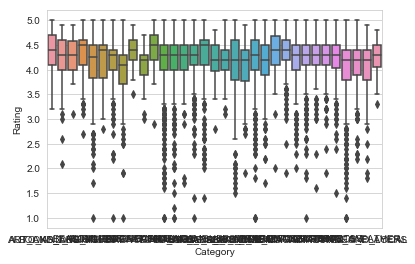

In [136]:
####################plot

####categorical features
## box plot of Category with Rating
sns.set_style('whitegrid')
sns.boxplot(x=playstore_data['Category'],y=playstore_data['Rating'])

##


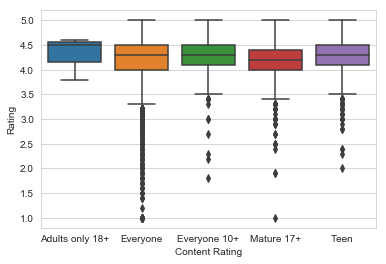

In [137]:
##box plot of Content Rating with Rating
sns.set_style('whitegrid')
sns.boxplot(x=playstore_data['Content Rating'],y=playstore_data['Rating'])


In [138]:
###temporary dataframe for Category and its codes
df_cat=pd.DataFrame()
df_cat['Category']=playstore_data['Category']
df_cat['Category_new']=playstore_data['CategoryUpdated']
df_cat['Category'].unique(),'',df_cat['Category_new'].unique()

([ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, BUSINESS, ..., PARENTING, WEATHER, VIDEO_PLAYERS, NEWS_AND_MAGAZINES, MAPS_AND_NAVIGATION]
 Length: 33
 Categories (33, object): [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, ..., WEATHER, VIDEO_PLAYERS, NEWS_AND_MAGAZINES, MAPS_AND_NAVIGATION],
 '',
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18,
        14, 11, 20, 27, 26, 24, 28, 30, 29, 23, 25, 22, 32, 31, 21, 19],
       dtype=int64))

In [139]:
######Category wise average rating
df_cat.loc[df_cat['Category']=='FAMILY']
res=playstore_data.groupby('Category')['Rating'].mean()

###top 10 records based on rating
playstore_data.nlargest(10,'Rating')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,UpdatedSize,Updated_ContentRating,CategoryUpdated
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,1000,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up,37.0,1,5
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,1000,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up,4.4,3,7
615,Awake Dating,DATING,5.0,2,70M,100,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up,70.0,3,7
633,Spine- The dating app,DATING,5.0,5,9.3M,500,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up,9.3,4,7
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up,5.0,3,7
640,Online Girls Chat Group,DATING,5.0,5,5.0M,100,Free,0.0,Mature 17+,Dating,"August 2, 2018",8.2,4.0.3 and up,5.0,3,7
654,Speeding Joyride & Car Meet App,DATING,5.0,3,25M,100,Free,0.0,Mature 17+,Dating,"July 20, 2018",1.2.9,4.1 and up,25.0,3,7
1028,SUMMER SONIC app,EVENTS,5.0,4,61M,500,Free,0.0,Everyone,Events,"July 24, 2018",1.0,4.4 and up,61.0,1,10
1030,Prosperity,EVENTS,5.0,16,2.3M,100,Free,0.0,Everyone,Events,"July 9, 2018",1.14,2.0 and up,2.3,1,10
1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21M,100,Free,0.0,Everyone,Events,"July 3, 2018",1.0.5,4.4 and up,21.0,1,10


In [140]:
####################correlation
playstore_data.corr()

,Rating,Reviews,Installs,Price,UpdatedSize,Updated_ContentRating,CategoryUpdated
Rating,1.000000,0.068735,0.050922,-0.022303,0.082329,0.027225,-0.038257
Reviews,0.068735,1.000000,0.634996,-0.009418,0.237887,0.070943,0.008791
Installs,0.050922,0.634996,1.000000,-0.011148,0.168865,0.055262,0.032116
Price,-0.022303,-0.009418,-0.011148,1.000000,-0.023775,-0.014979,-0.013290
UpdatedSize,0.082329,0.237887,0.168865,-0.023775,1.000000,0.183306,-0.124759
Updated_ContentRating,0.027225,0.070943,0.055262,-0.014979,0.183306,1.000000,-0.092430
CategoryUpdated,-0.038257,0.008791,0.032116,-0.013290,-0.124759,-0.092430,1.000000


c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


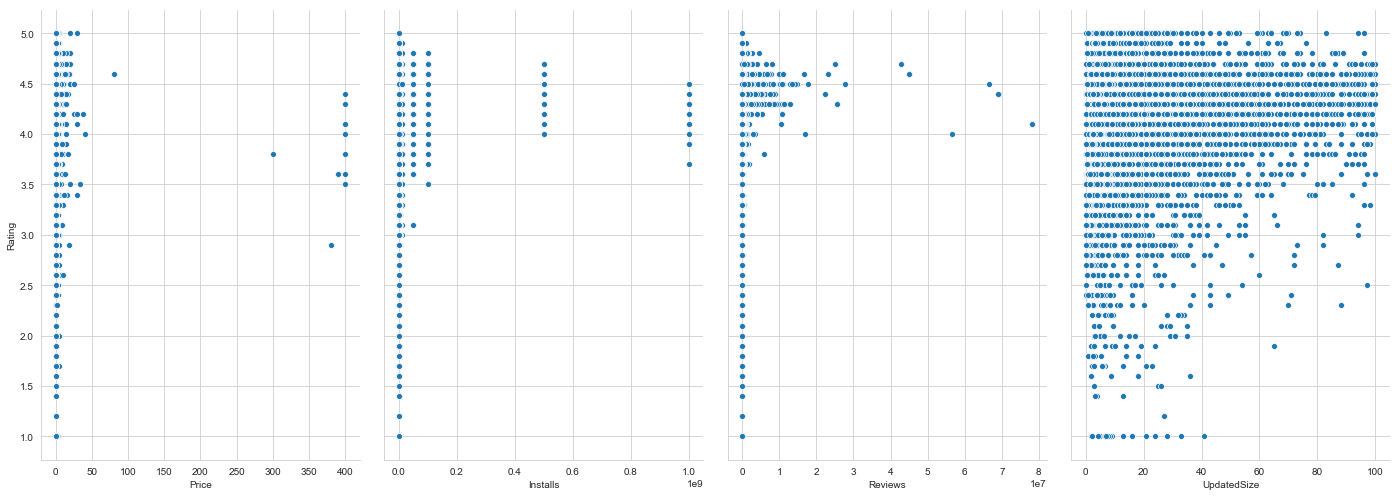

In [141]:
#########exploring relationship between response variable and other features
sns.pairplot(playstore_data, x_vars=['Price','Installs','Reviews','UpdatedSize'], y_vars='Rating', size=7, aspect=0.7)


In [ ]:
#################ANALYZING DEPENDENT VAR - Rating 

In [142]:
#############nan value in Rating column- remove those records
# playstore_data.loc[playstore_data['Rating'].isna()]
playstore_data.dropna(subset=['Rating'],inplace=True) #9366 not nnull records

In [143]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 16 columns):
App                      8892 non-null object
Category                 8892 non-null category
Rating                   8892 non-null float64
Reviews                  8892 non-null int64
Size                     8892 non-null object
Installs                 8892 non-null int64
Type                     8892 non-null object
Price                    8892 non-null float64
Content Rating           8892 non-null category
Genres                   8891 non-null object
Last Updated             8892 non-null object
Current Ver              8888 non-null object
Android Ver              8890 non-null object
UpdatedSize              7424 non-null float64
Updated_ContentRating    8892 non-null int8
CategoryUpdated          8892 non-null int8
dtypes: category(2), float64(3), int64(2), int8(2), object(7)
memory usage: 939.5+ KB


In [144]:
####got to know updatedsize column has na values
playstore_data.loc[playstore_data['UpdatedSize'].isna()]
# sns.boxplot(x='UpdatedSize',y='Rating',data=playstore_data)
######

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,UpdatedSize,Updated_ContentRating,CategoryUpdated
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0.00,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,NaN,1,0
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0.00,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,NaN,1,0
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,1000000,Free,0.00,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,NaN,1,1
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,5000000,Free,0.00,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,NaN,1,1
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,100000,Free,0.00,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,NaN,1,1
73,PDD-UA,AUTO_AND_VEHICLES,4.8,736,Varies with device,100000,Free,0.00,Everyone,Auto & Vehicles,"July 29, 2018",2.9,2.3.3 and up,NaN,1,1
85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,Varies with device,1000000,Free,0.00,Everyone,Auto & Vehicles,"August 4, 2018",Varies with device,Varies with device,NaN,1,1
88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,Varies with device,1000000,Free,0.00,Everyone,Auto & Vehicles,"August 3, 2018",Varies with device,Varies with device,NaN,1,1
89,Zona Azul Digital Fácil SP CET - OFFICIAL São ...,AUTO_AND_VEHICLES,4.6,7880,Varies with device,100000,Free,0.00,Everyone,Auto & Vehicles,"May 10, 2018",4.6.5,Varies with device,NaN,1,1
92,Fuelio: Gas log & costs,AUTO_AND_VEHICLES,4.6,65786,Varies with device,1000000,Free,0.00,Everyone,Auto & Vehicles,"August 2, 2018",Varies with device,4.0.3 and up,NaN,1,1


In [ ]:
############outliers
#https://hackernoon.com/choosing-the-right-machine-learning-algorithm-68126944ce1f

In [ ]:
##########statistical analysis
## 1. Look at Summary statistics and visualizations
# Percentiles can help identify the range for most of the data
# Averages and medians can describe central tendency
# Correlations can indicate strong relationships

## 2. Visualize the data
# Box plots can identify outliers
# Density plots and histograms show the spread of data
# Scatter plots can describe bivariate relationships

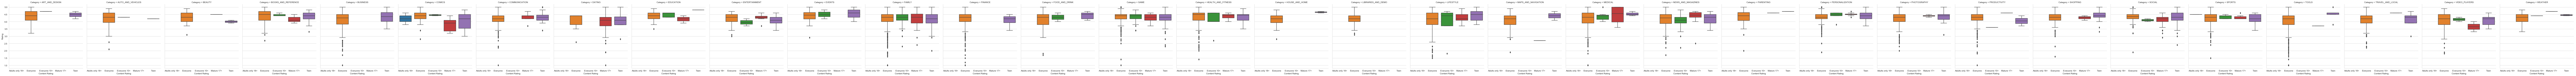

In [145]:
#####Plot of content ratiung vs rating wrt category
sns.catplot(x="Content Rating", y="Rating", col="Category", data=playstore_data, kind="box")

In [146]:
playstore_data.groupby('Category')['UpdatedSize'].mean()

Category
ART_AND_DESIGN         12.766102
AUTO_AND_VEHICLES      21.541270
BEAUTY                 15.513514
BOOKS_AND_REFERENCE    14.227832
BUSINESS               14.010356
COMICS                 13.157551
COMMUNICATION          12.337282
DATING                 17.597872
EDUCATION              20.035263
ENTERTAINMENT          22.638806
EVENTS                 14.432368
FAMILY                 29.741238
FINANCE                18.610989
FOOD_AND_DRINK         24.057317
GAME                   45.102096
HEALTH_AND_FITNESS     23.056683
HOUSE_AND_HOME         17.678000
LIBRARIES_AND_DEMO     12.491774
LIFESTYLE              15.513333
MAPS_AND_NAVIGATION    17.448632
MEDICAL                19.246931
NEWS_AND_MAGAZINES     12.645679
PARENTING              21.579545
PERSONALIZATION        11.591964
PHOTOGRAPHY            17.032089
PRODUCTIVITY           12.756234
SHOPPING               16.913585
SOCIAL                 18.268765
SPORTS                 26.445603
TOOLS                   8.293776
T

In [147]:
################# Imputing nan values of UpdatedSize column with mean as per the category.
playstore_data['UpdatedSize']=playstore_data.groupby('Category')['UpdatedSize'].transform(lambda x: x.fillna(x.mean()))

In [148]:
playstore_data.loc[playstore_data['UpdatedSize'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,UpdatedSize,Updated_ContentRating,CategoryUpdated


In [149]:
#########resetting index
playstore_data.reset_index(inplace=True)

In [153]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 17 columns):
index                    8892 non-null int64
App                      8892 non-null object
Category                 8892 non-null category
Rating                   8892 non-null float64
Reviews                  8892 non-null int64
Size                     8892 non-null object
Installs                 8892 non-null int64
Type                     8892 non-null object
Price                    8892 non-null float64
Content Rating           8892 non-null category
Genres                   8891 non-null object
Last Updated             8892 non-null object
Current Ver              8888 non-null object
Android Ver              8890 non-null object
UpdatedSize              8892 non-null float64
Updated_ContentRating    8892 non-null int8
CategoryUpdated          8892 non-null int8
dtypes: category(2), float64(3), int64(3), int8(2), object(7)
memory usage: 939.6+ KB


In [ ]:
# for i in playstore_data.columns:
#     if(i == 'index'):
#         continue
#     if(playstore_data[i].dtype=='float64' or playstore_data[i].dtype=='int64'):
#         print(i)
#         sns.boxplot(playstore_data[i])



In [151]:
#######rounding off the values in UpdatedSize column to 2 values
playstore_data['UpdatedSize']=np.round(playstore_data['UpdatedSize'],2)

In [152]:
playstore_data.iloc[218]

index                                          230
App                      Genius Scan - PDF Scanner
Category                                  BUSINESS
Rating                                         4.4
Reviews                                      42492
Size                            Varies with device
Installs                                   1000000
Type                                          Free
Price                                            0
Content Rating                            Everyone
Genres                                    Business
Last Updated                         July 11, 2018
Current Ver                     Varies with device
Android Ver                     Varies with device
UpdatedSize                                  14.01
Updated_ContentRating                            1
CategoryUpdated                                  4
Name: 218, dtype: object

### Feature Selection

In [154]:
playstore_data.columns 

Index(['index', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'UpdatedSize', 'Updated_ContentRating',
       'CategoryUpdated'],
      dtype='object')

In [155]:
playstore_data=playstore_data.drop(columns='index')

In [156]:
########################Feature selection
features=['CategoryUpdated','Updated_ContentRating','UpdatedSize','Installs','Price'] ##MANUALLY SELECTED

In [157]:
playstore_data[features]

,CategoryUpdated,Updated_ContentRating,UpdatedSize,Installs,Price
0,0,1,19.00,10000,0.0
1,0,1,14.00,500000,0.0
2,0,1,8.70,5000000,0.0
3,0,4,25.00,50000000,0.0
4,0,1,2.80,100000,0.0
5,0,1,5.60,50000,0.0
6,0,1,19.00,50000,0.0
7,0,1,29.00,1000000,0.0
8,0,1,33.00,1000000,0.0
9,0,1,3.10,10000,0.0


### Predictions W/O Feature Scaling

In [158]:
X=playstore_data[features]

In [159]:
Y=playstore_data['Rating']

In [160]:
########random splitting of train-test data (75%- 25%)
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.25,random_state=7)

In [161]:
print('Total Features Shape:',X.shape)
print('Total Labels Shape:',Y.shape)
print('Training Features Shape:',train_X.shape)
print('Training labels Shape:',train_Y.shape)
print('Testing Features Shape:',test_X.shape)
print('Testing Labels Shape:',test_Y.shape)

Total Features Shape: (8892, 5)
Total Labels Shape: (8892,)
Training Features Shape: (6669, 5)
Training labels Shape: (6669,)
Testing Features Shape: (2223, 5)
Testing Labels Shape: (2223,)


In [222]:
playstore_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,UpdatedSize,Updated_ContentRating,CategoryUpdated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,1,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,1,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,4,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,1,0


In [221]:
X.head(5)

,CategoryUpdated,Updated_ContentRating,UpdatedSize,Installs,Price
0,0,1,19.0,10000,0.0
1,0,1,14.0,500000,0.0
2,0,1,8.7,5000000,0.0
3,0,4,25.0,50000000,0.0
4,0,1,2.8,100000,0.0


### Decision Tree Regressor

In [163]:
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    ["criterion='mse'", "splitter='best'", 'max_depth=None', 'min_samples_split=2', 'min_samples_leaf=1', 'min_weight_fraction_leaf=0.0', 'max_features=None', 'random_state=None', 'max_leaf_nodes=None', 'min_impurity_decrease=0.0', 'min_impurity_split=None', 'presort=False'],
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="mse")
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
       Mean Absolute Erro

In [214]:
##########create a Decision Tree regressor object 
regressor= DecisionTreeRegressor(random_state=0,min_samples_leaf=500,min_impurity_decrease=0.001)
regressor.fit(train_X,train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.001,
           min_impurity_split=None, min_samples_leaf=500,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [224]:
#############important features
regressor.feature_importances_

array([0.14300895, 0.        , 0.        , 0.85699105, 0.        ])

In [215]:
##############to check Codes for category and content rating
df_Cat=pd.DataFrame()
df_Cat['Category']=playstore_data['Category'].unique()
df_Cat['Category_code']=playstore_data['CategoryUpdated'].unique()
df_Content=pd.DataFrame()
df_Content['ContentRating']=playstore_data['Content Rating'].unique()
df_Content['ContentRating_code']=playstore_data['Updated_ContentRating'].unique()
print(df_Content)
print(df_Cat)

     ContentRating  ContentRating_code
0         Everyone                   1
1             Teen                   4
2     Everyone 10+                   2
3       Mature 17+                   3
4  Adults only 18+                   0
               Category  Category_code
0        ART_AND_DESIGN              0
1     AUTO_AND_VEHICLES              1
2                BEAUTY              2
3   BOOKS_AND_REFERENCE              3
4              BUSINESS              4
5                COMICS              5
6         COMMUNICATION              6
7                DATING              7
8             EDUCATION              8
9         ENTERTAINMENT              9
10               EVENTS             10
11              FINANCE             12
12       FOOD_AND_DRINK             13
13   HEALTH_AND_FITNESS             15
14       HOUSE_AND_HOME             16
15   LIBRARIES_AND_DEMO             17
16            LIFESTYLE             18
17                 GAME             14
18               FAMILY  

In [216]:
############Prediction WITH TEST DATA
pred_test=regressor.predict(test_X)
##########Mean Absolute error for continuous values
print(mean_absolute_error(pred_test, test_Y))

0.344295660797206


In [227]:
###########MAPE DEFINITION
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [272]:
###########MAPE 
MAPE=mean_absolute_percentage_error(test_Y,pred_test)
dT_accuracy=100-np.mean(MAPE)
print(f"Accuracy of Decision TRee model is :{np.round(dT_accuracy,2)}%")

Accuracy of Decision TRee model is :90.7%


In [217]:
######## Actual and predicted values
test_res_dT=pd.DataFrame()
test_res_dT['Actual']=test_Y
test_res_dT['Pred']=pred_test
test_res_dT

,Actual,Pred
6182,2.8,4.151058
8431,4.1,4.217862
4579,4.7,4.217862
6899,4.2,4.342507
3123,4.6,4.342507
6414,4.3,3.973019
7392,4.5,4.342507
1748,4.5,4.151058
6126,4.7,4.244009
3135,3.7,4.217862


In [218]:
############Prediction WITH MANUAL TEST VALUES
mse=np.round(mean_absolute_error(pred_test, test_Y),2)
data_pred=np.asarray([1,1,13.0,50000000,0.0]).reshape(1,-1) #####For OLA app -> Category: Auto and vehicles(1), ContentRating: Everyone(1),Size: 13mb(13.0),Installs : 50M+(50000000),Price: 0.0(0.0)
y_pred=np.round(regressor.predict(data_pred),1)
print('Prediction of the Rating with the given Data:',y_pred)
print(f'With MSE of {mse},the range of the predicted value {y_pred} would be ({y_pred-mse},{y_pred+mse})')
###########Actual RATING of Ola app is 4.1

Prediction of the Rating with the given Data: [4.3]
With MSE of 0.34,the range of the predicted value [4.3] would be ([3.96],[4.64])


In [219]:
#############Decison tree
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='DecisionTree_im.dot', 
               feature_names =train_X.columns) 

In [ ]:
### Dot to png
https://dreampuf.github.io/GraphvizOnline

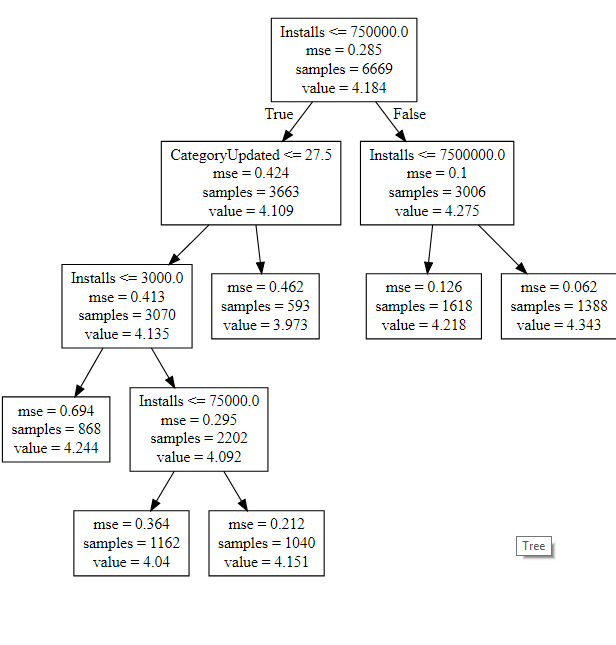

In [249]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'dec.png')

### Random Forest Regressor

In [ ]:
##############################feature importance using Gradient Boosting Decision Trees (GBDT) for Regression
# Why don't you consider Gradient Boosting Decision Trees (GBDT) for Regression which you will find many Python implementation for (XGboost, LightGBM and CatBoost).

# The good things about GBDTs (more relevant to your problem) are:

# They have an intrinsic way to calculate feature importance (due to the way trees splits work .e.g Gini score and so on).
# They can deal with categorical variables that you have (sex, smoke, region)
# Also account for any possible correlations among your variables. Simple linear models fail to capture any correlations which could lead to overfitting.
# There are many ways to regularize GBDTs, which may come very handy!
# With GBDTs you only have to be careful with continuous variable, in your case the bmi variable, not to be artificially overruling your trees (trees have hard time dealing very continuous data). You can easily overcome this challenge by rounding up/down or binning your continuous variable or other methods.

# If you have strong reasons to stick to linear regressions, maybe you could use LASSO which is a regularized linear regression that harshly penalizes (=0) the less important variables. People actually use LASSO for feature selection as well.



In [229]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    ["n_estimators='warn'", "criterion='mse'", 'max_depth=None', 'min_samples_split=2', 'min_samples_leaf=1', 'min_weight_fraction_leaf=0.0', "max_features='auto'", 'max_leaf_nodes=None', 'min_impurity_decrease=0.0', 'min_impurity_split=None', 'bootstrap=True', 'oob_score=False', 'n_jobs=None', 'random_state=None', 'verbose=0', 'warm_start=False'],
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

    .. versionchanged:: 0.20
       The default value of ``

In [240]:
#######create a RaF regressor object
rf_regressor=RandomForestRegressor(n_estimators=50,random_state=0,min_samples_leaf=500)
rf_regressor.fit(train_X,train_Y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=500, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [241]:
rf_regressor.feature_importances_

array([0.10320281, 0.        , 0.03234769, 0.8644495 , 0.        ])

In [242]:
########Prediction with test data
rf_test=rf_regressor.predict(test_X)
##########Mean Absolute error for continuous values
print(mean_absolute_error(rf_test, test_Y))

0.3435077129413122


In [271]:
###########MAPE 
MAPE=mean_absolute_percentage_error(test_Y,rf_test)
rf_accuracy=100-np.mean(MAPE)
print(f"Accuracy ofRandom Forest Regressor model is :{np.round(rf_accuracy,2)}%")

Accuracy ofRandom Forest Regressor model is :90.73%


In [244]:
######## Actual and predicted values
test_res_rf=pd.DataFrame()
test_res_rf['Actual']=test_Y
test_res_rf['Pred']=rf_test
test_res_rf

,Actual,Pred
6182,2.8,4.049248
8431,4.1,4.207734
4579,4.7,4.233645
6899,4.2,4.341154
3123,4.6,4.341154
6414,4.3,4.118091
7392,4.5,4.327025
1748,4.5,4.125745
6126,4.7,4.200004
3135,3.7,4.160807


In [245]:
############Prediction WITH MANUAL TEST VALUES
mse=np.round(mean_absolute_error(rf_test, test_Y),2)
data_pred=np.asarray([1,1,13.0,50000000,0.0]).reshape(1,-1) #####For OLA app -> Category: Auto and vehicles(1), ContentRating: Everyone(1),Size: 13mb(13.0),Installs : 50M+(50000000),Price: 0.0(0.0)
y_pred=np.round(rf_regressor.predict(data_pred),1)
print('Prediction of the Rating with the given Data:',y_pred)
print(f'With MSE of {mse},the range of the predicted value {y_pred} would be ({y_pred-mse},{y_pred+mse})')
###########Actual RATING of Ola app is 4.1

Prediction of the Rating with the given Data: [4.3]
With MSE of 0.34,the range of the predicted value [4.3] would be ([3.96],[4.64])


In [246]:
estimator=rf_regressor.estimators_[5]

In [247]:
# Export as dot file
export_graphviz(estimator, out_file='tree_rf.dot', 
                feature_names = train_X.columns)



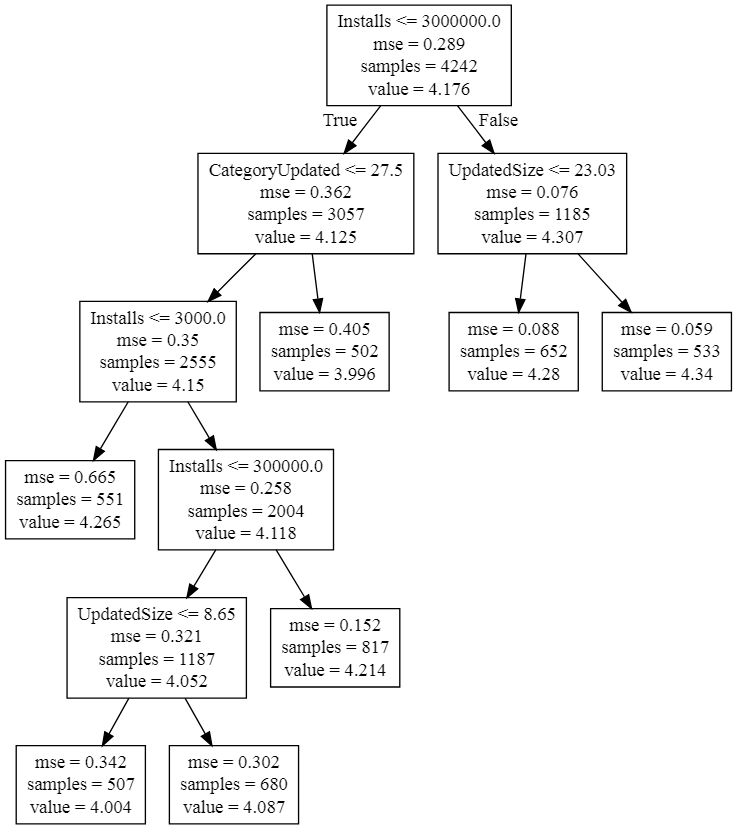

In [248]:
# Display in jupyter notebook
Image(filename = 'RFTree.png')

### Prediction with Feature Scaling

In [252]:
##############Feature scaling
# scale=StandardScaler()
# train_X_scaled=scale.fit_transform(train_X)
# print(train_X_scaled)
# test_X_scaled=scale.fit_transform(test_X)
# print(test_X_scaled)


c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[[ 0.75081638 -0.46451418 -0.74096619 -0.17809138 -0.06438658]
 [-0.33544766 -0.46451418 -0.84169995 -0.18451703 -0.06438658]
 [ 1.83708042  2.52280025 -0.0999332  -0.18451703 -0.06438658]
 ...
 [ 1.47499241 -0.46451418 -0.82796353 -0.19081416  0.04601091]
 [ 1.11290439 -0.46451418  0.58688786 -0.12668622 -0.06438658]
 [-1.18031969  1.52702878 -0.59444437 -0.19094255 -0.06438658]]
[[ 0.85254152 -0.48596235 -0.87392976 -0.19725867 -0.0433924 ]
 [-1.57315897 -0.48596235 -0.40015133 -0.18891792 -0.0433924 ]
 [-0.7241638  -0.48596235 -0.65583391 -0.15184793 -0.0433924 ]
 ...
 [-0.7241638  -0.48596235  0.99148581 -0.19809275 -0.0433924 ]
 [-0.48159375 -0.48596235  0.85227569 -0.18891792 -0.0433924 ]
 [ 1.58025166 -0.48596235 -0.26140525 -0.19725867 -0.0433924 ]]


c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [257]:
mx_scale=MinMaxScaler(feature_range=(0, 1))
train_X_scaled=mx_scale.fit_transform(train_X)
print(train_X_scaled)
test_X_scaled=mx_scale.fit_transform(test_X)
print(test_X_scaled)

[[7.18750000e-01 2.50000000e-01 5.99059906e-02 9.99999001e-04
  0.00000000e+00]
 [4.37500000e-01 2.50000000e-01 3.79037904e-02 4.99999000e-04
  0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.99919992e-01 4.99999000e-04
  0.00000000e+00]
 ...
 [9.06250000e-01 2.50000000e-01 4.09040904e-02 9.99900001e-06
  4.97500000e-03]
 [8.12500000e-01 2.50000000e-01 3.49934993e-01 4.99999900e-03
  0.00000000e+00]
 [2.18750000e-01 7.50000000e-01 9.19091909e-02 9.00000001e-09
  0.00000000e+00]]
[[7.50000000e-01 2.50000000e-01 3.79037904e-02 9.99990001e-05
  0.00000000e+00]
 [1.25000000e-01 2.50000000e-01 1.40014001e-01 9.99999001e-04
  0.00000000e+00]
 [3.43750000e-01 2.50000000e-01 8.49084908e-02 4.99999900e-03
  0.00000000e+00]
 ...
 [3.43750000e-01 2.50000000e-01 4.39943994e-01 9.99900001e-06
  0.00000000e+00]
 [4.06250000e-01 2.50000000e-01 4.09940994e-01 9.99999001e-04
  0.00000000e+00]
 [9.37500000e-01 2.50000000e-01 1.69916992e-01 9.99990001e-05
  0.00000000e+00]]


c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [260]:
train_XScaled=pd.DataFrame(train_X_scaled)
# df_scaled['train_X']=train_X_scaled
# df_scaled['test_X']=test_X_scaled
print(train_XScaled)
test_XScaled=pd.DataFrame(test_X_scaled)
print(test_XScaled)

# print(df_scaled.head(5))

            0     1         2             3         4
0     0.71875  0.25  0.059906  9.999990e-04  0.000000
1     0.43750  0.25  0.037904  4.999990e-04  0.000000
2     1.00000  1.00  0.199920  4.999990e-04  0.000000
3     0.43750  0.50  0.389939  9.999000e-06  0.000000
4     0.75000  0.25  0.071907  4.990000e-07  0.000000
5     0.34375  1.00  0.919992  9.990000e-07  0.000000
6     0.28125  0.25  0.119912  9.999900e-05  0.000000
7     0.06250  0.25  0.229923  9.999990e-04  0.000000
8     0.87500  0.25  0.489949  9.999900e-05  0.000000
9     0.43750  0.25  0.629963  9.999999e-03  0.000000
10    0.78125  0.25  0.037904  9.999990e-04  0.000000
11    0.34375  0.25  0.038904  9.900000e-08  0.000000
12    0.62500  0.25  0.739974  9.999900e-05  0.000000
13    0.78125  0.25  0.065907  9.999990e-04  0.000000
14    0.34375  0.25  0.048905  9.990000e-07  0.012100
15    0.34375  0.25  0.179918  9.999900e-05  0.000000
16    0.34375  0.25  0.022902  9.999900e-05  0.000000
17    0.18750  0.25  0.38993

### KNN for Regression

In [261]:
knn_regressor=KNeighborsRegressor(n_neighbors=20)
knn_regressor.fit(train_XScaled,train_Y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

In [262]:
########Prediction with test data
knn_test=knn_regressor.predict(test_XScaled)
##########Mean Absolute error for continuous values
print(mean_absolute_error(knn_test, test_Y))

0.3550044984255511


In [273]:
###########MAPE 
MAPE=mean_absolute_percentage_error(test_Y,knn_test)
knn_accuracy=100-np.mean(MAPE)
print(f"Accuracy of KNN Regressor model is :{np.round(knn_accuracy,2)}%")

Accuracy of KNN Regressor model is :90.44%


In [264]:
######## Actual and predicted values
test_res_rf=pd.DataFrame()
test_res_rf['Actual']=test_Y
test_res_rf['Pred']=knn_test
test_res_rf

,Actual,Pred
6182,2.8,4.030
8431,4.1,3.950
4579,4.7,4.255
6899,4.2,3.735
3123,4.6,4.250
6414,4.3,4.160
7392,4.5,4.340
1748,4.5,4.355
6126,4.7,4.145
3135,3.7,4.195


In [265]:
############Prediction WITH MANUAL TEST VALUES
mae=np.round(mean_absolute_error(knn_test, test_Y),2)
data_pred=np.asarray([1,1,13.0,50000000,0.0]).reshape(1,-1) #####For OLA app -> Category: Auto and vehicles(1), ContentRating: Everyone(1),Size: 13mb(13.0),Installs : 50M+(50000000),Price: 0.0(0.0)
y_pred=np.round(knn_regressor.predict(data_pred),1)
print('Prediction of the Rating with the given Data:',y_pred)
print(f'With MAE of {mse},the range of the predicted value {y_pred} would be ({y_pred-mae},{y_pred+mae})')
###########Actual RATING of Ola app is 4.1

Prediction of the Rating with the given Data: [4.3]
With MSE of 0.36,the range of the predicted value [4.3] would be ([3.94],[4.66])


In [268]:
####Paramter tuning : k 
#to store mae values for different k
mae_val = [] 
for K in range(30):
    K = K+1
    knn_regressor = KNeighborsRegressor(n_neighbors = K)
    knn_regressor.fit(train_XScaled,train_Y)  #fit the model
    pred=knn_regressor.predict(test_XScaled) #make prediction on test set
    error = mean_absolute_error(test_Y,pred) #calculate mae
    mae_val.append(error) #store mae values
    print('MAE value for k= ' , K , 'is:', error)

MAE value for k=  1 is: 0.43913630229419703
MAE value for k=  2 is: 0.403936122357175
MAE value for k=  3 is: 0.39245763982606086
MAE value for k=  4 is: 0.3772829509671615
MAE value for k=  5 is: 0.3706072874493927
MAE value for k=  6 is: 0.36619433198380563
MAE value for k=  7 is: 0.36739284107705156
MAE value for k=  8 is: 0.36381016644174546
MAE value for k=  9 is: 0.36201829359724097
MAE value for k=  10 is: 0.36078272604588396
MAE value for k=  11 is: 0.359722733406944
MAE value for k=  12 is: 0.35949167791273057
MAE value for k=  13 is: 0.35848299249108967
MAE value for k=  14 is: 0.35719105455947564
MAE value for k=  15 is: 0.3563112910481332
MAE value for k=  16 is: 0.35693600989653623
MAE value for k=  17 is: 0.35575666163901465
MAE value for k=  18 is: 0.35568051182086274
MAE value for k=  19 is: 0.35551293889244034
MAE value for k=  20 is: 0.3550044984255511
MAE value for k=  21 is: 0.3551185656448815
MAE value for k=  22 is: 0.35398315135157243
MAE value for k=  23 is: 0.3

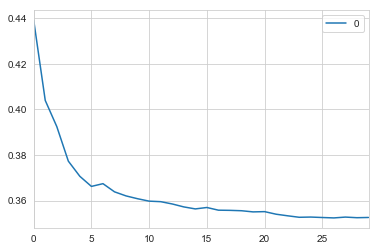

In [269]:
#plotting the mae values against k values
curve = pd.DataFrame(mae_val) #elbow curve 
curve.plot()

In [275]:
#################Comparison of algorithms with their accuracy
model_names=['Decision Tree','Random Forest','KNN']
accuarcy=[dT_accuracy,rf_accuracy,knn_accuracy]
df_CompRes=pd.DataFrame()
df_CompRes['Model']=model_names
df_CompRes['Accuracy']=accuarcy
df_CompRes.head(5)

,Model,Accuracy
0,Decision Tree,90.700528
1,Random Forest,90.728377
2,KNN,90.444496
